In [1]:
#IN QUESTO IPYNB VIENE GESTITA LA FASE DI ADDESTRAMENTO DEL DATA SET
#DOBBIAMO FAR SI CHE LE IMMAGINI SIANO TUTTI DELLE STESSE DIMENSIONI
#IL COLORE DELL'IMMAGINE NON è IMPORTANTE QUINDI TUTTE LE IMMAGINI VENGO DEFINITE IN BIANCO E NERO 


#ABBIAMO A DISPOSIZIONE UNA CARTELLA CON MIGLIAIA DI IMMAGINI. UNA PARTE UTILIZZATA PER L'ADDESTRAMENTO 
#L'ALTRA PER IL TESTING 


#UNA VOLTA EFFETTUATE LE OPERAZIONI SUL DATASET, ESSO PUò ESSERE PASSATO ALLE RETI NEURALI PER LA CLASSIFICAZIONE.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = 'C:\Windows\System32\Deep-Learning-master\dogs_breed_classification\Data\PetImages'

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  #ITERAZIONE PER OGNI CANE E PER OGNI GATTO
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # CONVERZIONE ARRAY
        plt.imshow(img_array, cmap='gray')  # PASSAGGIO DALL'IMMAGINI A COLORI A BIANCO E NERO
        plt.show()  # VISUALIZZAZIONE

        break  
    break 



<Figure size 640x480 with 1 Axes>

In [3]:
print(img_array)

[[189 189 189 ...  29  29  31]
 [186 186 186 ...  36  35  36]
 [184 185 185 ...  35  33  33]
 ...
 [168 169 170 ...  71  72  72]
 [169 170 171 ...  68  67  67]
 [168 169 170 ...  64  63  62]]


In [4]:
print(img_array.shape)

(398, 500)


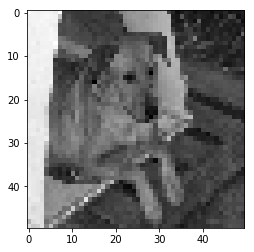

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

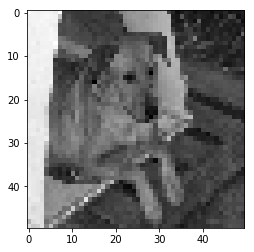

In [6]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  #0=DOG 1=CAT

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 12485/12485 [10:33<00:00,  6.01it/s]


24914


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
0
1
0
1
0


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 58]
   [ 25]
   [ 49]
   ...
   [  6]
   [  3]
   [  5]]

  [[ 54]
   [124]
   [ 80]
   ...
   [  2]
   [  3]
   [ 12]]

  [[ 82]
   [ 37]
   [ 40]
   ...
   [  2]
   [  3]
   [ 13]]

  ...

  [[170]
   [182]
   [182]
   ...
   [206]
   [203]
   [215]]

  [[171]
   [177]
   [171]
   ...
   [211]
   [213]
   [215]]

  [[169]
   [174]
   [168]
   ...
   [209]
   [215]
   [220]]]]


In [11]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)